# Detecting the Presence of Pneumonia in Chest X-ray's using ConvNets and Tensorflow

Importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
import os
import matplotlib.image as mpimg

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We download the dataset directly from Kaggle. 
To do so we have to enter the username and the generated API key 
To download a fresh API token refer this link : https://www.kaggle.com/docs/api

In [3]:
os.environ['KAGGLE_USERNAME'] = 'shawngonsalves'
os.environ['KAGGLE_KEY'] = '5cb92d69670ca012562c63050667b2b3'

Mount the drive to the Colab Runtime

In [4]:
from google.colab import drive
drive.mount('/content/drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

# Description of the Pneumonia Dataset
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

The link for downloading the dataset is https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [6]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [7]:
train = get_training_data('/content/chest_xray/train')
test = get_training_data('/content/chest_xray/test')
val = get_training_data('/content/chest_xray/val')

In [8]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'
validation_dir = '/content/chest_xray/val'

In [9]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

In [10]:
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )

Checking for total number of images in each sub-directory

In [11]:
print('total training normal images :', len(os.listdir(      train_normal_dir ) ))
print('total training pneumonia images :', len(os.listdir(      train_pneumonia_dir ) ))

print('total test normal images :', len(os.listdir(      test_normal_dir ) ))
print('total test pneumonia images :', len(os.listdir(      test_pneumonia_dir ) ))

print('total validation normal images :', len(os.listdir( validation_normal_dir ) ))
print('total validation pneumonia images :', len(os.listdir( validation_pneumonia_dir ) ))


total training normal images : 1341
total training pneumonia images : 3875
total test normal images : 234
total test pneumonia images : 390
total validation normal images : 8
total validation pneumonia images : 8


Total train and test images

In [12]:
total_train  = len(os.listdir(      train_normal_dir ) ) + len(os.listdir(      train_pneumonia_dir ) )
print('Total training images are:', total_train)
total_test  = len(os.listdir(      test_normal_dir ) ) + len(os.listdir(      test_pneumonia_dir ) )
print('Total test images are:', total_test)

Total training images are: 5216
Total test images are: 624


In [13]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 5216 images belonging to 2 classes.


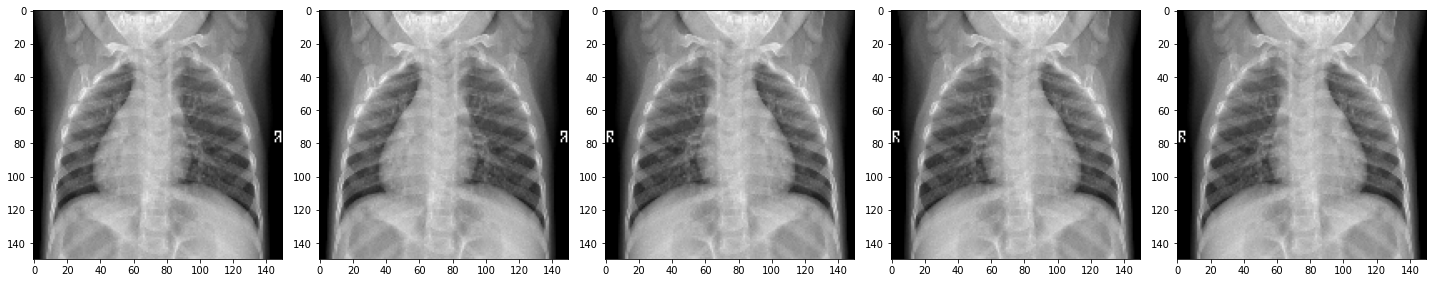

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(15)]
plotImages(augmented_images)

In [17]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 5216 images belonging to 2 classes.


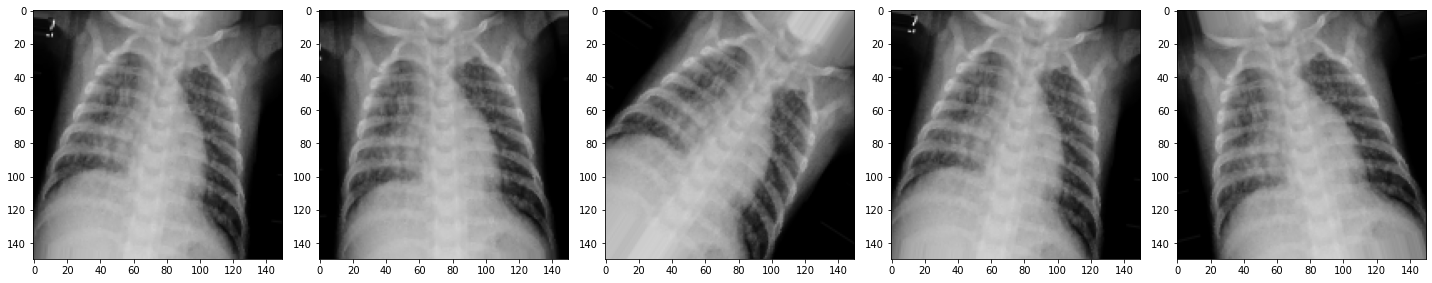

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 5216 images belonging to 2 classes.


In [20]:

print(train_data_gen.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


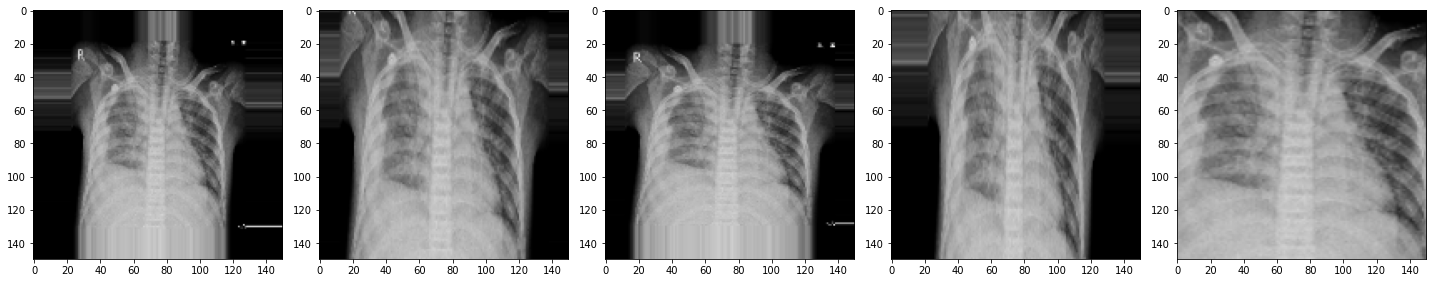

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [22]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 5216 images belonging to 2 classes.


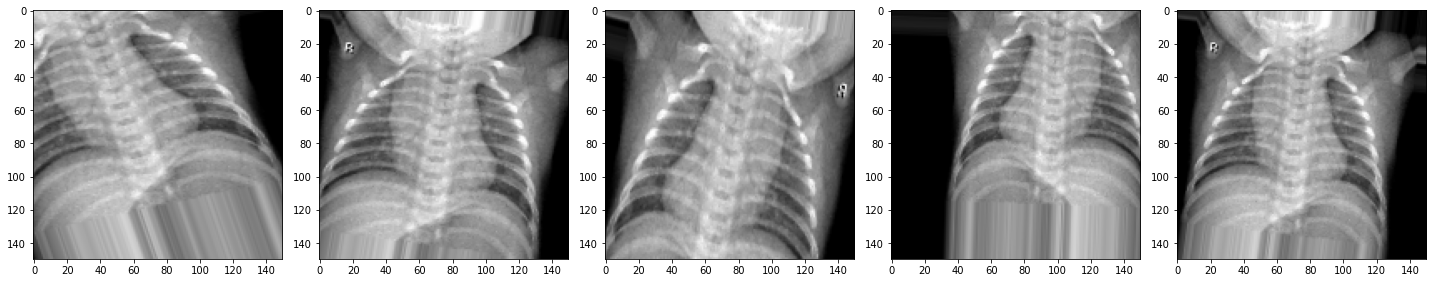

In [23]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)


In [24]:
image_gen_val = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 624 images belonging to 2 classes.


In [25]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 16 images belonging to 2 classes.


In [26]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [29]:
epochs= 100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)),           
   )
)

Epoch 1/100
53/53 [==============================] - 72s 1s/step - loss: 0.6016 - accuracy: 0.7418 - val_loss: 0.6760 - val_accuracy: 0.6250
Epoch 2/100
53/53 [==============================] - 74s 1s/step - loss: 0.5037 - accuracy: 0.7465 - val_loss: 0.9395 - val_accuracy: 0.6250
Epoch 3/100
53/53 [==============================] - 73s 1s/step - loss: 0.4594 - accuracy: 0.7642 - val_loss: 0.5848 - val_accuracy: 0.6779
Epoch 4/100
53/53 [==============================] - 71s 1s/step - loss: 0.4301 - accuracy: 0.7864 - val_loss: 0.6142 - val_accuracy: 0.6538
Epoch 5/100
53/53 [==============================] - 71s 1s/step - loss: 0.3809 - accuracy: 0.8204 - val_loss: 0.4807 - val_accuracy: 0.7596
Epoch 6/100
53/53 [==============================] - 71s 1s/step - loss: 0.3429 - accuracy: 0.8441 - val_loss: 0.3581 - val_accuracy: 0.8510
Epoch 7/100
53/53 [==============================] - 71s 1s/step - loss: 0.2907 - accuracy: 0.8740 - val_loss: 0.3501 - val_accuracy: 0.8317
Epoch 8/100
5

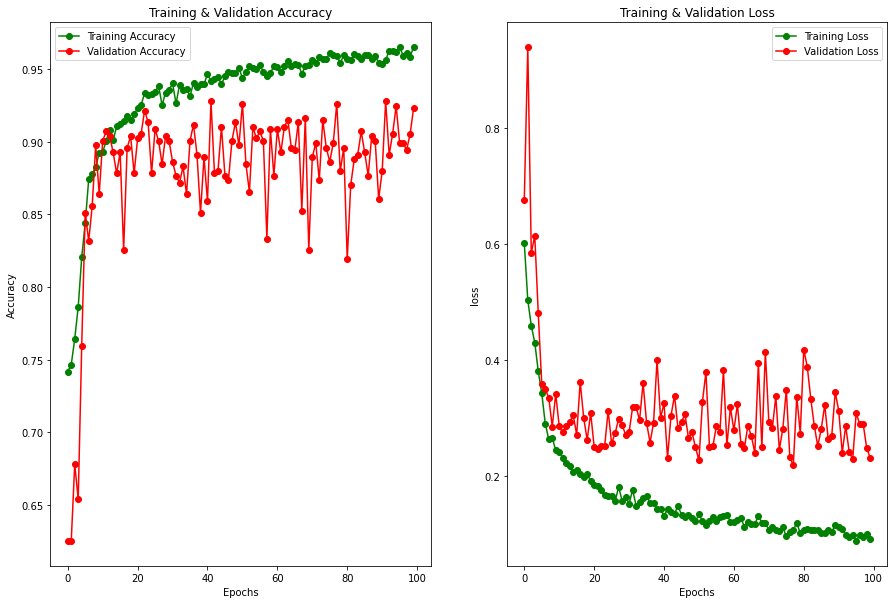

In [31]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(15,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("loss")
plt.show()

In [36]:
import time
saved_model_path = "/content/drive/My Drive/PneumoniaDetectionModels/Model{}".format(int(time.time()))
model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/PneumoniaDetectionModels/Model1597710522/assets


In [39]:
result  = model.evaluate_generator(test_data_gen, steps=len(test_data_gen), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

7/7 [==============================] - 4s 566ms/step - loss: 0.2318 - accuracy: 0.9231
Loss: 0.23177196085453033
Accuracy: 0.9230769276618958


In [34]:
result  = model.evaluate_generator(val_data_gen,steps=len(val_data_gen), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8750
Loss: 0.4418104887008667
Accuracy: 0.875


We test out the model with the Normal sub dir of validation dataset.

Saving normal.jpg to normal (1).jpg


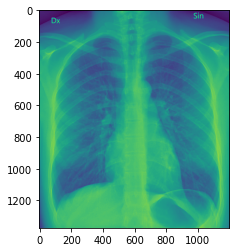

0.0750792
 Result: NORMAL


In [43]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '' + fn
  img = image.load_img(path,target_size=(150,150))
  


  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()


  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])
  
  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print(' Result: NORMAL')
else:
    print(' Result: PNEUMONIA')

Saving person63_virus_121.jpeg to person63_virus_121.jpeg


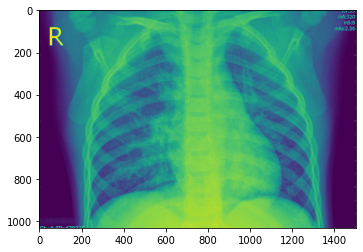

-1.7192445
Result: PNEUMONIA


In [46]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/test/PNEUMONIA/' + fn
  img = image.load_img(path,target_size=(150,150))
  
  

  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])

  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print('Result: NORMAL')
else:
    print('Result: PNEUMONIA')

Val pneumonia

Saving person1954_bacteria_4886.jpeg to person1954_bacteria_4886.jpeg


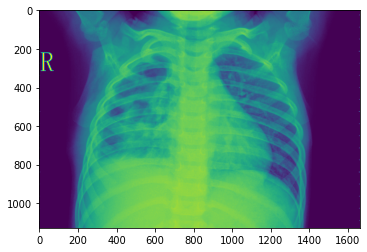

-1.0021888
Result: PNEUMONIA


In [47]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/val/PNEUMONIA/' + fn
  img = image.load_img(path,target_size=(150,150))


  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])

  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print('Result: NORMAL')
else:
    print('Result: PNEUMONIA')

Saving IM-0006-0001.jpeg to IM-0006-0001.jpeg


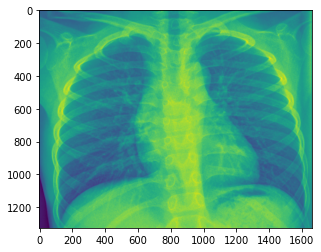

0.31432503
Result: NORMAL


In [48]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/chest_xray/test/NORMAL/' + fn
  img = image.load_img(path,target_size=(150,150))

  imge = mpimg.imread(path)
  imgplot = plt.imshow(imge)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  images = np.vstack([x])

  classes = reloaded.predict(images, batch_size = 10)
  classes = classes[0][0]
  print(classes)

if classes >0:
    print('Result: NORMAL')
else:
    print('Result: PNEUMONIA')

Convert the Model to a JSON file with sharded weights so that it can be used for **Deployment** on the Web Browser

In [50]:
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/drive/My Drive/ModelJSON/')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


Reloading the model for **Transfer Learning**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
reloaded = tf.keras.models.load_model(
    '/content/drive/My Drive/PneumoniaDetectionModels/Model1597710522',
    custom_objects={'KerasLayer': hub.KerasLayer})
reloaded.summary()